In [8]:
import sympy as sp

x = sp.symbols('x')

q = sp.exp(-x**2)
Z = sp.integrate(q, (x,-sp.oo,sp.oo))
q = q / Z
muhat = sp.integrate(x*q, (x,-sp.oo,sp.oo))
sigmasqhat = sp.integrate(x*x*q, (x,-sp.oo,sp.oo)) - muhat**2
print(muhat)
print(sigmasqhat)

0
1/2


0.4936232661566186

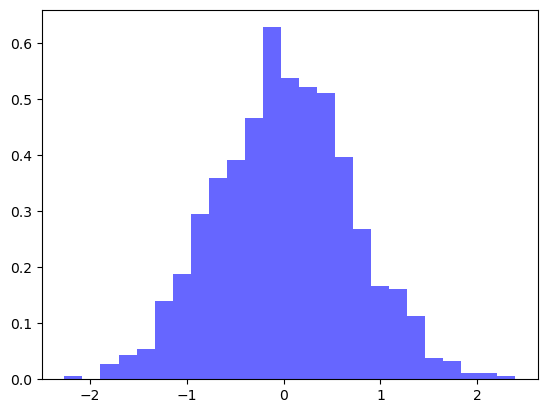

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,0.5)1000.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

np.var(d)


In [12]:
new_string = ""
def sympy_convert(s):
    new_string = s.replace("log", "sp.log")
    new_string = new_string.replace("x1", "x")
    new_string = new_string.replace("exp", "sp.exp")
    return new_string

# def numpy_convert(s):
#     new_string = s.replace("log", "np.log")
#     new_string = new_string.replace("x1", "arr[i]")
#     new_string = new_string.replace("exp", "np.exp")
#     return new_string

s = "exp(x1**2*(x1 - 24.75602193203185)/(x1 + 50.418291333340534))"
print(sympy_convert(s))
# print(numpy_convert(s))

sp.exp(x**2*(x - 24.75602193203185)/(x + 50.418291333340534))


exp(x**2*(x - 24.7560219320318)/(x + 50.4182913333405))
exp(x**2*(x - 24.7560219320318)/(x + 50.4182913333405))


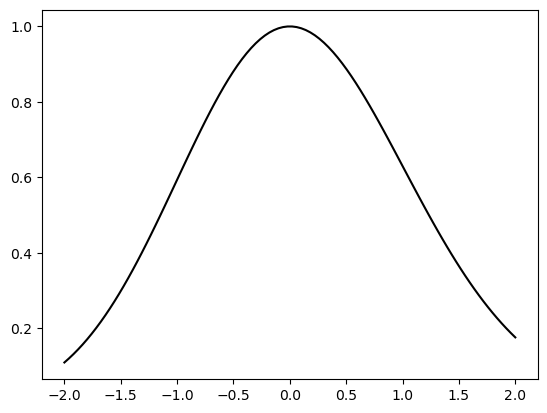

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = sp.symbols('x')
huh = sp.exp(x**2*(x - 24.75602193203185)/(x + 50.418291333340534))
print(huh)
print(huh.simplify())
h_func = sp.lambdify(x, huh, 'numpy')

x_vals = np.linspace(-2,2,100)
y_vals = h_func(x_vals)

plt.plot(x_vals, y_vals, color='black', linestyle='-')
plt.show()

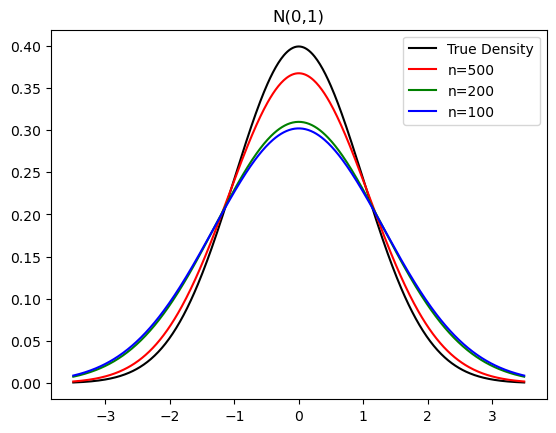

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,1)500.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
# plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

mu = 0.0
var = 1 #sigma^2
def func(x):
    return 1/(np.sqrt(2*np.pi*var))*np.exp(-x**2/(2*var))

x_vals = np.linspace(-3.5, 3.5, 500)
y_vals = func(x_vals)

var = 1/(2*0.4236)

x_valss = np.linspace(-3.5, 3.5, 500)
y_valss = func(x_valss)

var = 1/(2*0.3012)

x_valsss = np.linspace(-3.5, 3.5, 500)
y_valsss = func(x_valsss)

var = 1/(2*0.2863)

x_valssss = np.linspace(-3.5, 3.5, 500)
y_valssss = func(x_valssss)

plt.plot(x_vals, y_vals, color='black', linestyle='-')
plt.plot(x_valss, y_valss, color='red', linestyle='-')
plt.plot(x_valsss, y_valsss, color='green', linestyle='-')
plt.plot(x_valssss, y_valssss, color='blue', linestyle='-')
plt.legend(['True Density', 'n=500', 'n=200', 'n=100'])
plt.title("N(0,1)")
plt.show()


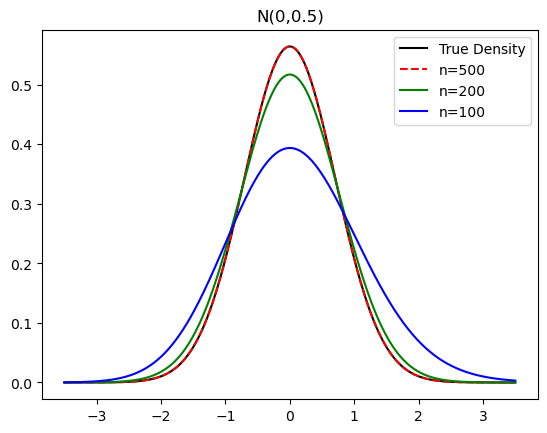

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp

x = sp.symbols('x')
huh = sp.exp(x**2*(x - 24.75602193203185)/(x + 50.418291333340534))/2.54
h_func = sp.lambdify(x, huh, 'numpy')

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,1)500.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
# plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

mu = 0.0
var = 0.5
def func(x):
    return 1/(np.sqrt(2*np.pi*var))*np.exp(-x**2/(2*var))

x_vals = np.linspace(-3.5, 3.5, 500)
y_vals = func(x_vals)

x_valss = np.linspace(-3.5, 3.5, 500)
y_valss = h_func(x_valss)

var = 1/(2*0.8401)

x_valsss = np.linspace(-3.5, 3.5, 500)
y_valsss = func(x_valsss)

var = 0.5

x_valssss = np.linspace(-3.5, 3.5, 500)
y_valssss = func(x_valssss)

plt.plot(x_vals, y_vals, color='black', linestyle='-')
plt.plot(x_valssss, y_valssss, color='red', linestyle='--')
plt.plot(x_valsss, y_valsss, color='green', linestyle='-')
plt.plot(x_valss, y_valss, color='blue', linestyle='-')
plt.legend(['True Density', 'n=500', 'n=200', 'n=100'])
plt.title("N(0,0.5)")
plt.show()


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp

import os
os.chdir('/home/pl61/density-regression/deep-symbolic-optimization/dso')

from dso.kernels import (
    PolynomialKernel,
    GaussianKernel,
    LaplacianKernel,
    InverseMultiQuadraticKernel,
    SteinKernel,
    DSOSteinKernel
)
from dso.discrepancies import MaximumMeanDiscrepancy, KernelSteinDiscrepancy, DSOKernelSteinDiscrepancy

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,0.5)1000.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
print(1/(2*np.var(d)))
# N = 200
# d = np.random.uniform(0, 1, N)

x = sp.symbols('x')
# density = sp.Piecewise((1, (x > 0) & (x < 1)), (0, True))
# density = sp.exp(0)
# density = sp.log(-x**2 + x + 1.4512650931035769)
density = sp.exp(-x**2/2)
# density = sp.exp(-x**2 * 0.5)

gaussian_kernel = GaussianKernel(sigma=0.01) 
DSOstein_kernel = DSOSteinKernel(
    kernel=gaussian_kernel,
    distribution=density
)
DSOksd = DSOKernelSteinDiscrepancy(DSO_stein_kernel = DSOstein_kernel)
y = d.reshape(-1, 1)

def reward(y):
    return 0 if DSOksd.compute(y) <= -2 else 1/(1 +np.abs(DSOksd.compute(y)))

def rew_given_dens(formula):
    gaussian_kernel = GaussianKernel(sigma=0.01) 
    dd = DSOSteinKernel(
        kernel=gaussian_kernel,
        distribution=formula
    )
    ddd = DSOKernelSteinDiscrepancy(DSO_stein_kernel = dd)
    y = d.reshape(-1, 1)
    return 0 if ddd.compute(y) <= -2 else 1/(1 +np.abs(ddd.compute(y)))

print(rew_given_dens(sp.exp(-x**2)))
print(rew_given_dens(0+x-x))
# grid = np.linspace(0.0, 1.0, 1000)
# rr = np.zeros_like(grid)
# for i in range(len(grid)):
#     rr[i] = rew_given_dens(sp.exp(-x**2 * grid[i]))
    # print(rr[i])

0.9828835781788903
0.9883550108798258
0.980971131046391


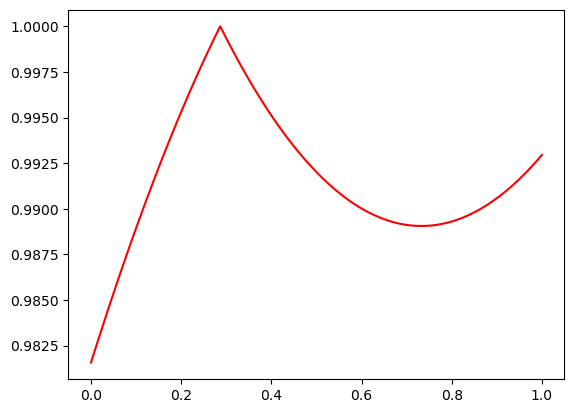

In [5]:
plt.plot(grid, rr, color='r', linestyle='-')
plt.show()

In [6]:
print(np.max(rr))
print(grid[np.argmax(rr)])

0.9999889855202062
0.2862862862862863


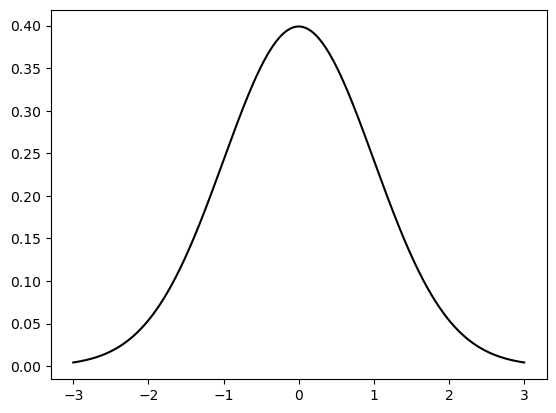

In [28]:
def normal_pdf(x):
    return np.exp(-x**2/2) / (np.sqrt(2*np.pi))

gg = np.linspace(-3, 3, 1000)
normal = normal_pdf(gg)

plt.plot(gg, normal, color='black', linestyle='-')
plt.show()

In [ ]:
plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

def func(val):
    f = sp.lambdify(x, density, 'numpy')
    result = f(val)
    if np.isscalar(result):
        return np.ones_like(val)
    return result

x_vals = np.linspace(-2, 2, 100)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, color='r', linestyle='-')
plt.show()

In [ ]:
from scipy.optimize import minimize

